# Workshop 3: spacing

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import math

# Display float info
print("System float information:")
print(sys.float_info)

System float information:
sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)


## Exercise 1: Floating Point Spacing

In [2]:
x = 2**52
y = np.nextafter(x, np.inf)
spacing = y - x
print(f"Spacing in [2^52, 2^53]: {spacing}")

print(f"Next number after 2^52: {y}")

z = x + 0.5
print(f"x + 0.5: {z} (equal to x? {z == x})")

q = y + 0.5
print(f"y + 0.5: {q} (equal to y? {q == y})")

Spacing in [2^52, 2^53]: 1.0
Next number after 2^52: 4503599627370497.0
x + 0.5: 4503599627370496.0 (equal to x? True)
y + 0.5: 4503599627370498.0 (equal to y? False)


## Exercise 2: Cardinality of Finite Numbers

In [3]:
t = sys.float_info.mant_dig 
L = sys.float_info.min_exp
U = sys.float_info.max_exp

cardinality = 2 * (2-1) * 2**(t-1) * (U-L+1) + 1
print(f"Cardinality of finite floating-point numbers: {cardinality:.2e}")

Cardinality of finite floating-point numbers: 1.84e+19


## Exercise 3: Machine Epsilon Verification

In [4]:
eps = sys.float_info.epsilon
print(f"System epsilon: {eps}")
print(f"2^-52: {2**-52}")

x = eps/2
print(f"1 + eps/2 == 1? {1 + x == 1}")
print(f"1 + eps != 1? {1 + eps != 1}")

System epsilon: 2.220446049250313e-16
2^-52: 2.220446049250313e-16
1 + eps/2 == 1? True
1 + eps != 1? True


## Exercise 4: Floating Point Associativity

In [5]:
a = 0.1234567890123400e16
b = -0.1234567890123401e16
c = 0.06

print("First set:")
print(f"(a+b)+c = {(a+b)+c}")
print(f"(a+c)+b = {(a+c)+b}")
print(f"a+(b+c) = {a+(b+c)}")

a = 0.23371258e-4
b = 0.33678429e2
c = -0.33677911e2

print("\nSecond set:")
print(f"(a+b)+c = {(a+b)+c}")
print(f"(a+c)+b = {(a+c)+b}")
print(f"a+(b+c) = {a+(b+c)}")

First set:
(a+b)+c = -0.94
(a+c)+b = -1.0
a+(b+c) = -1.0

Second set:
(a+b)+c = 0.0005413712580022434
(a+c)+b = 0.0005413712580022434
a+(b+c) = 0.0005413712579995743


## Exercise 5: Summation Methods Comparison

In [6]:
arr = np.full(10, 0.1)

sum_loop = 0.0
for num in arr:
    sum_loop += num

sum_np = np.sum(arr)

print(f"For loop sum: {sum_loop}")
print(f"Numpy sum: {sum_np}")
print(f"Exact value: {1.0}")
print(f"For loop error: {abs(sum_loop-1.0)}")
print(f"Numpy error: {abs(sum_np-1.0)}")

For loop sum: 0.9999999999999999
Numpy sum: 1.0
Exact value: 1.0
For loop error: 1.1102230246251565e-16
Numpy error: 0.0


## Exercise 6: Numerically Stable vs Unstable Formulas

In [7]:
def y1(x):
    return np.sqrt(x**2 + 1) - x

def y2(x):
    return 1 / (np.sqrt(x**2 + 1) + x)

x_values = [7777, 77777777]

for x in x_values:
    print(f"x = {x}")
    print(f"y1 = {y1(x)}")
    print(f"y2 = {y2(x)}")
    print()

x = 7777
y1 = 6.429214317904552e-05
y2 = 6.429214323431402e-05

x = 77777777
y1 = 0.0
y2 = 6.428571492857143e-09



## Exercise 7: Floating Point Error Analysis

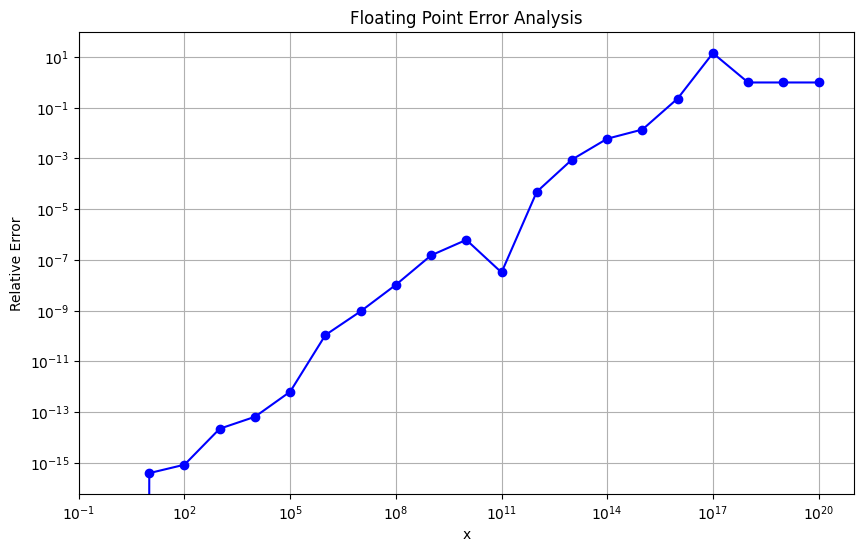

In [8]:
x = np.array([10**i for i in range(21)])

A = 1/x - 1/(x+1)

B = 1/(x*(x+1))

rel_error = np.abs(A - B) / np.abs(B)

plt.figure(figsize=(10,6))
plt.loglog(x, rel_error, 'bo-')
plt.xlabel('x')
plt.ylabel('Relative Error')
plt.title('Floating Point Error Analysis')
plt.grid(True)
plt.show()

## Exercise 8: Approximating Euler's Number

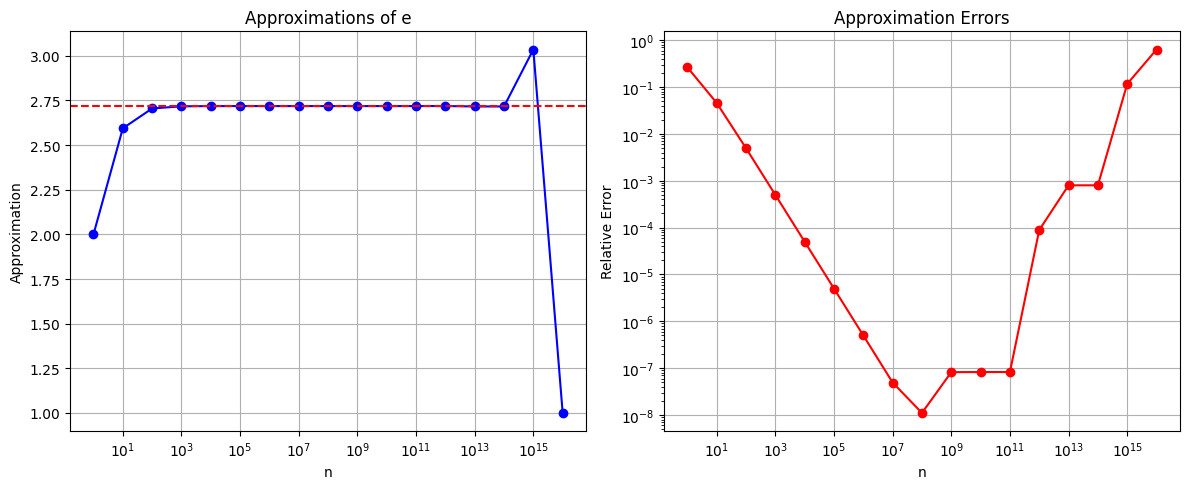

In [9]:
k_values = range(0, 17)
n_values = [10**k for k in k_values]

approximations = [(1 + 1/n)**n for n in n_values]

exact = math.exp(1)

errors = [abs(approx - exact)/exact for approx in approximations]

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.semilogx(n_values, approximations, 'bo-')
plt.axhline(y=exact, color='r', linestyle='--')
plt.xlabel('n')
plt.ylabel('Approximation')
plt.title('Approximations of e')
plt.grid(True)

plt.subplot(1,2,2)
plt.loglog(n_values, errors, 'ro-')
plt.xlabel('n')
plt.ylabel('Relative Error')
plt.title('Approximation Errors')
plt.grid(True)

plt.tight_layout()
plt.show()